In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd

In [6]:
raw_data_dir = os.path.abspath('../data/yfinance_fx_historical/raw_data')
label_data_dir = os.path.abspath('../data/yfinance_fx_historical/label_data')

In [ ]:
# use file_name as the unique key
# (r_stop, r_take, T, step_size) -> file_name -> load and transform

In [106]:
def load_df(file_path) -> pd.DataFrame:
    df = pd.read_csv(file_path, header=0)
    return df


def get_file_name(r_stop, r_take, T, step_size):
    return f'labels-r_stop={r_stop}-r_take={r_take}-T={T}-step_size={step_size}.csv'


def get_dist_of_labels(r_stop, r_take, T, step_size, pdt=None) -> pd.Series:
    file_name = get_file_name(r_stop, r_take, T, step_size)
    df = load_df(file_path=os.path.join(label_data_dir, file_name))

    # Getting the distribution of labels
    label_distribution = df['label'].value_counts()
    label_distribution = label_distribution / label_distribution.sum()
    
    return label_distribution

def get_dist_of_labels_df(key, *params) -> pd.DataFrame:
    df = []
    for param in params:
        label_dist = get_dist_of_labels(param.r_stop, param.r_take, param.T, param.step_size, param.pdt)
        label_dist = label_dist.sort_index()  # must sort before translating into a list
        df.append([getattr(param, key)] + list(label_dist))
    df = pd.DataFrame(df, columns=[key, 'Label -1', 'Label 0', 'Label 1'])
    return df


def plot_label_dist(df, x='step_size'):
    # Assuming df is a DataFrame with columns 'step_size', 'Label -1', and 'Label 1'
    # Plotting the two graphs on the same plot
    plt.figure(figsize=(10, 6))
    plt.plot(df[x], df['Label -1'], label='Label -1')
    plt.plot(df[x], df['Label 1'], label='Label 1')
    plt.plot(df[x], df['Label 0'], label='Label 0')

    plt.xlabel(x)
    plt.ylabel('Labels')
    plt.title(f'Comparison of Label -1 and Label 1 by {x}')
    plt.legend()
    plt.show()

In [93]:
from dataclasses import dataclass, asdict

@dataclass
class Param:
    r_stop: float
    r_take: float
    T: int
    step_size: int
    pdt: str=None
    
    def to_dict(self):
        return asdict(self)
    
    def clone(self, changes: dict) -> 'Params':
        # Convert the dataclass instance to a dictionary
        original_dict = self.to_dict()

        # Update the dictionary with the changes
        updated_dict = {**original_dict, **changes}

        # Create a new instance of the dataclass with the updated dictionary
        return Params(**updated_dict)

# Define ranges for each parameter

1. r_stop_values = [0.01, 0.02, 0.03]
2. r_take_values = [0.02, 0.03, 0.04]
3. T_values = [5, 7, 10]
4. step_size_values = [1, 3, 7, 14, 28, 90, 180]

Without extra knowledge,
1. p_{0} ~ 0.725
2. p_{1}, p_{-1} ~ 0.135

In [ ]:
# Define ranges for each parameter
r_stop_values = [0.01, 0.02, 0.03]
r_take_values = [0.02, 0.03, 0.04]
T_values = [5, 7, 10]
step_size_values = [1, 3, 7, 14, 28, 90, 180]

In [94]:
param_base = Param(0.02, 0.02, 7, 1, None)

# The effect of step_size

In [95]:
# create parameter configurations for different step_size
step_size_param_configs = []
step_size_param_configs.append(param_base)  # add the base case first
for step_size in (1, 7, 14, 28, 90, 180):
    step_size_param_configs.append(param_base.clone(changes={'step_size': step_size}))
step_size_param_configs

[Param(r_stop=0.02, r_take=0.02, T=7, step_size=1, pdt=None),
 Params(r_stop=0.02, r_take=0.02, T=7, step_size=1, pdt=None),
 Params(r_stop=0.02, r_take=0.02, T=7, step_size=7, pdt=None),
 Params(r_stop=0.02, r_take=0.02, T=7, step_size=14, pdt=None),
 Params(r_stop=0.02, r_take=0.02, T=7, step_size=28, pdt=None),
 Params(r_stop=0.02, r_take=0.02, T=7, step_size=90, pdt=None),
 Params(r_stop=0.02, r_take=0.02, T=7, step_size=180, pdt=None)]

In [98]:
df = get_dist_of_labels_df('step_size', *step_size_param_configs)
df

,step_size,Label -1,Label 0,Label 1
0,1,0.136444,0.724582,0.138974
1,1,0.136444,0.724582,0.138974
2,7,0.135156,0.728148,0.136696
3,14,0.139785,0.728879,0.131336
4,28,0.144393,0.720430,0.135177
5,90,0.118227,0.724138,0.157635
6,180,0.095238,0.761905,0.142857


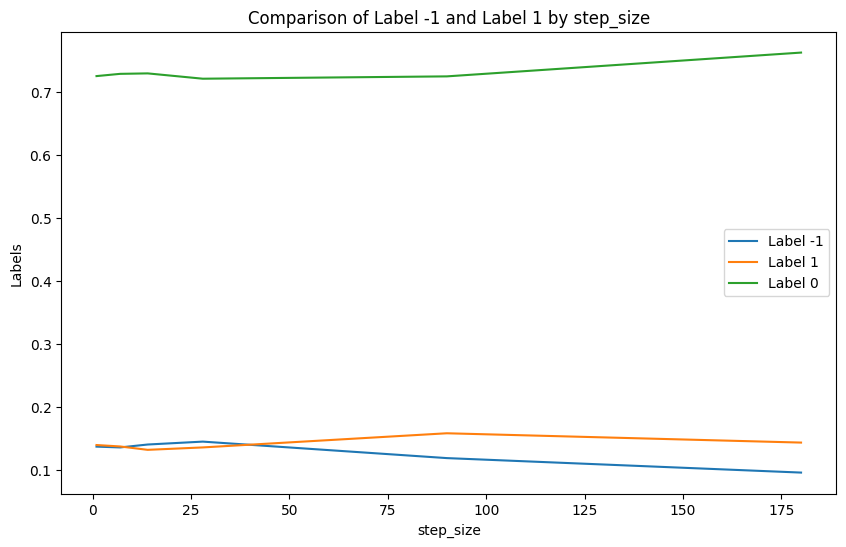

In [100]:
plot_label_dist(df, x='step_size')

# The effect of r_take

In [107]:
# create parameter configurations for different step_size
r_take_param_configs = []
r_take_param_configs.append(param_base)  # add the base case first
for r_take in (0.02, 0.03, 0.04):
    r_take_param_configs.append(param_base.clone(changes={'r_take': r_take}))
r_take_param_configs

[Param(r_stop=0.02, r_take=0.02, T=7, step_size=1, pdt=None),
 Params(r_stop=0.02, r_take=0.02, T=7, step_size=1, pdt=None),
 Params(r_stop=0.02, r_take=0.03, T=7, step_size=1, pdt=None),
 Params(r_stop=0.02, r_take=0.04, T=7, step_size=1, pdt=None)]

In [108]:
df = get_dist_of_labels_df('r_take', *r_take_param_configs)
df

,r_take,Label -1,Label 0,Label 1
0,0.02,0.136444,0.724582,0.138974
1,0.02,0.136444,0.724582,0.138974
2,0.03,0.137654,0.823724,0.038622
3,0.04,0.137764,0.848647,0.013589


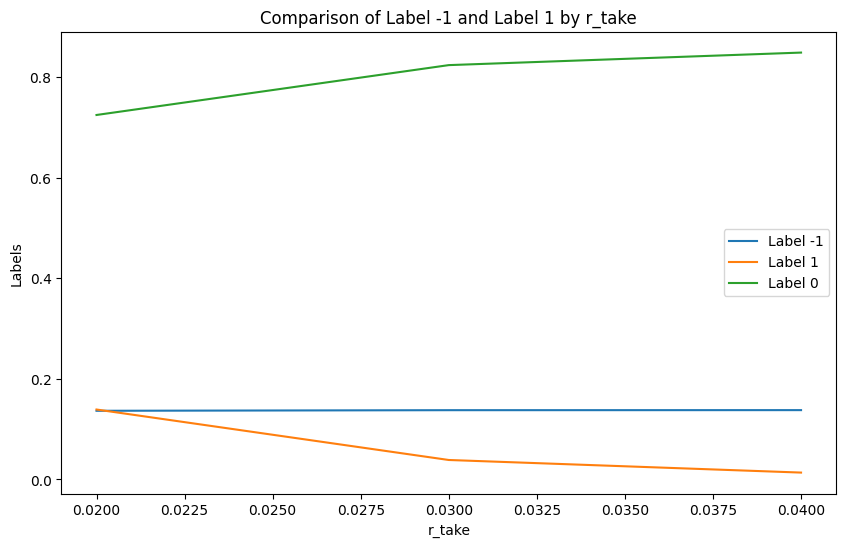

In [109]:
plot_label_dist(df, 'r_take')

# The effect of r_stop

In [113]:
# create parameter configurations for different step_size
r_stop_param_configs = []
r_stop_param_configs.append(param_base)  # add the base case first
for r_stop in (0.01, 0.02, 0.03):
    r_stop_param_configs.append(param_base.clone(changes={'r_stop': r_stop}))
r_stop_param_configs

[Param(r_stop=0.02, r_take=0.02, T=7, step_size=1, pdt=None),
 Params(r_stop=0.01, r_take=0.02, T=7, step_size=1, pdt=None),
 Params(r_stop=0.02, r_take=0.02, T=7, step_size=1, pdt=None),
 Params(r_stop=0.03, r_take=0.02, T=7, step_size=1, pdt=None)]

In [115]:
df = get_dist_of_labels_df('r_stop', *r_stop_param_configs)
df

,r_stop,Label -1,Label 0,Label 1
0,0.02,0.136444,0.724582,0.138974
1,0.01,0.420775,0.450924,0.128301
2,0.02,0.136444,0.724582,0.138974
3,0.03,0.044399,0.815361,0.140240


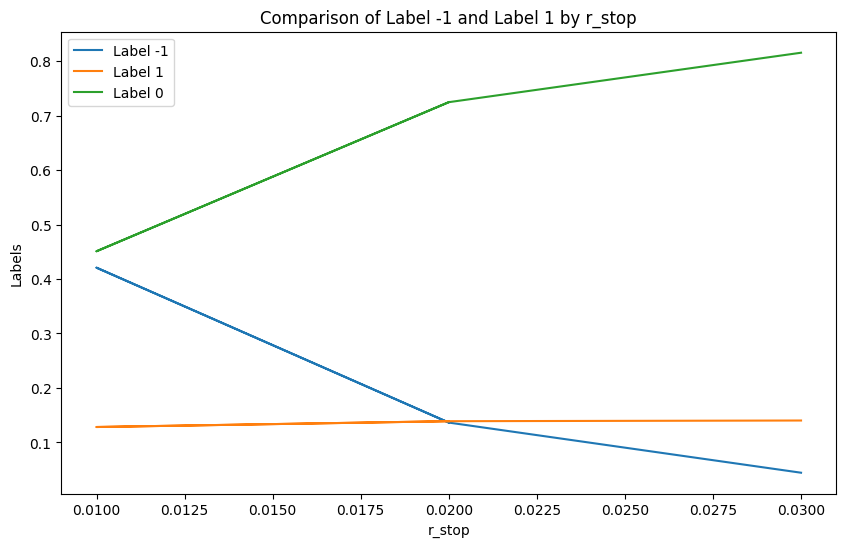

In [116]:
plot_label_dist(df, 'r_stop')

# The effect of T

In [117]:
# create parameter configurations for different step_size
T_param_configs = []
T_param_configs.append(param_base)  # add the base case first
for T in (5, 7, 10):
    T_param_configs.append(param_base.clone(changes={'T': T}))
T_param_configs

[Param(r_stop=0.02, r_take=0.02, T=7, step_size=1, pdt=None),
 Params(r_stop=0.02, r_take=0.02, T=5, step_size=1, pdt=None),
 Params(r_stop=0.02, r_take=0.02, T=7, step_size=1, pdt=None),
 Params(r_stop=0.02, r_take=0.02, T=10, step_size=1, pdt=None)]

In [119]:
df = get_dist_of_labels_df('T', *T_param_configs)
df

,T,Label -1,Label 0,Label 1
0,7,0.136444,0.724582,0.138974
1,5,0.088290,0.823035,0.088675
2,7,0.136444,0.724582,0.138974
3,10,0.199780,0.597521,0.202699


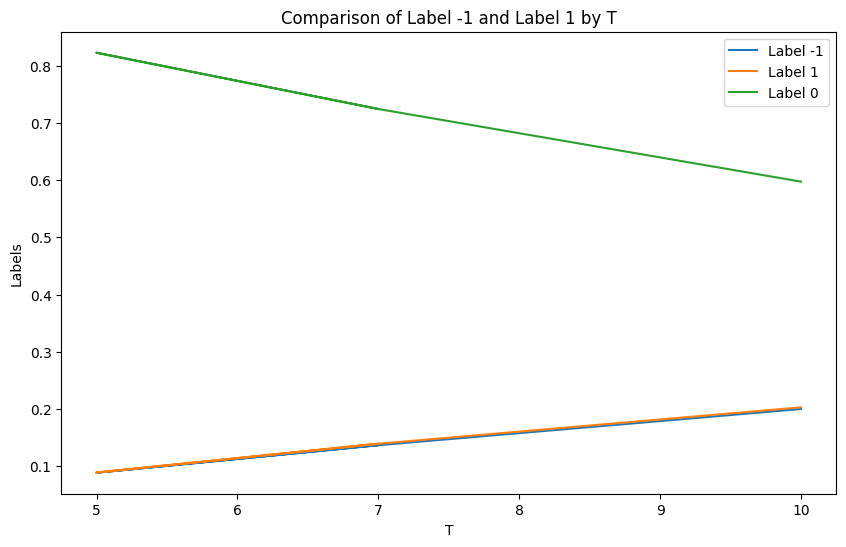

In [120]:
plot_label_dist(df, 'T')